# 1.&nbsp; initialization

## 1.1&nbsp; Import library

In [19]:
# Holy Grail of Imports
import os
import cv2
import random
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from pathlib import Path

## 1.2&nbsp; Load Data

In [20]:
dataset_folder = 'D:/SIBI/Datas'

# 2.&nbsp; Exploratory Data Analysis

## 2.1&nbsp; Check class imbalance

Jumlah gambar pada kategori A: 220
Jumlah gambar pada kategori B: 220
Jumlah gambar pada kategori C: 220
Jumlah gambar pada kategori D: 220
Jumlah gambar pada kategori E: 220
Jumlah gambar pada kategori F: 220
Jumlah gambar pada kategori G: 220
Jumlah gambar pada kategori H: 220
Jumlah gambar pada kategori I: 220
Jumlah gambar pada kategori K: 220
Jumlah gambar pada kategori L: 220
Jumlah gambar pada kategori M: 220
Jumlah gambar pada kategori N: 220
Jumlah gambar pada kategori O: 220
Jumlah gambar pada kategori P: 220
Jumlah gambar pada kategori Q: 220
Jumlah gambar pada kategori R: 220
Jumlah gambar pada kategori S: 220
Jumlah gambar pada kategori T: 220
Jumlah gambar pada kategori U: 220
Jumlah gambar pada kategori V: 220
Jumlah gambar pada kategori W: 220
Jumlah gambar pada kategori X: 220
Jumlah gambar pada kategori Y: 220


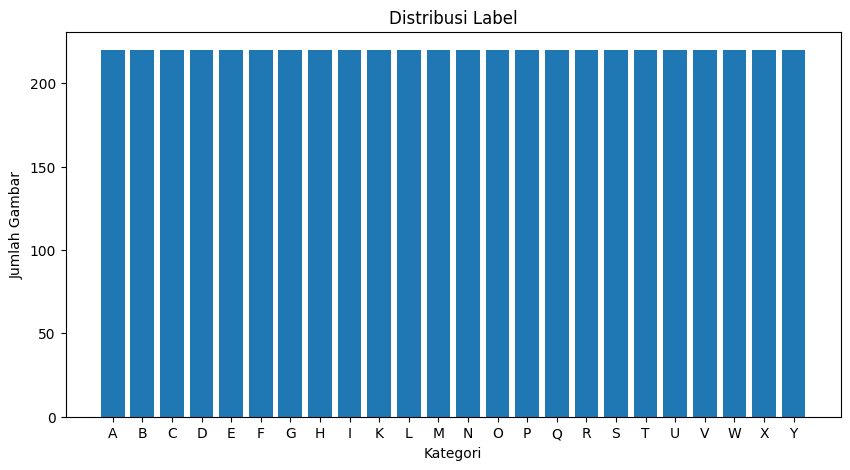

In [21]:
# Inisialisasi dictionary untuk menyimpan jumlah gambar per kategori
image_counts = {}

# Loop melalui setiap subfolder dalam dataset_folder
for category in os.listdir(dataset_folder):
    category_folder = os.path.join(dataset_folder, category)
    if os.path.isdir(category_folder):
        image_count = len(os.listdir(category_folder))
        image_counts[category] = image_count

# Tampilkan jumlah gambar per kategori
for category, count in image_counts.items():
    print(f"Jumlah gambar pada kategori {category}: {count}")

plt.figure(figsize=(10, 5))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('Kategori')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Label')
plt.show()

## 2.2&nbsp; Visualisasi gambar secara random di setiap kelas

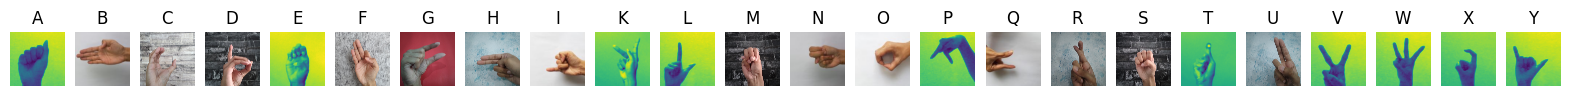

In [22]:
# Inisialisasi dictionary untuk menyimpan gambar random dari setiap kategori
random_images = {}

# Loop melalui setiap subfolder dalam dataset_folder
for category in os.listdir(dataset_folder):
    category_folder = os.path.join(dataset_folder, category)
    if os.path.isdir(category_folder):
        image_name = random.choice(os.listdir(category_folder))
        image_path = os.path.join(category_folder, image_name)
        image = mpimg.imread(image_path)
        random_images[category] = image

# Tampilkan gambar random dari setiap kategori
fig, axes = plt.subplots(1, len(random_images), figsize=(20, 5))
for i, (category, image) in enumerate(random_images.items()):
    axes[i].imshow(image)
    axes[i].set_title(category)
    axes[i].axis('off')
plt.show()

## 2.3.&nbsp; Informasi widht dan height secara random di setiap kelas

In [23]:
# Inisialisasi dictionary untuk menyimpan informasi gambar
image_info = {}

# Loop melalui setiap subfolder dalam dataset_folder
for category in os.listdir(dataset_folder):
    category_folder = os.path.join(dataset_folder, category)
    if os.path.isdir(category_folder):
        image_name = random.choice(os.listdir(category_folder))
        image_path = os.path.join(category_folder, image_name)
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        image_info[category] = {
            'width': width,
            'height': height
        }

# Tampilkan informasi gambar
for category, info in image_info.items():
    print(f"Kategori: {category}, Lebar: {info['width']}, Tinggi: {info['height']}")

Kategori: A, Lebar: 250, Tinggi: 250
Kategori: B, Lebar: 250, Tinggi: 250
Kategori: C, Lebar: 3000, Tinggi: 3000
Kategori: D, Lebar: 150, Tinggi: 150
Kategori: E, Lebar: 3000, Tinggi: 3000
Kategori: F, Lebar: 3000, Tinggi: 3000
Kategori: G, Lebar: 150, Tinggi: 150
Kategori: H, Lebar: 3000, Tinggi: 3000
Kategori: I, Lebar: 3000, Tinggi: 3000
Kategori: K, Lebar: 250, Tinggi: 250
Kategori: L, Lebar: 250, Tinggi: 250
Kategori: M, Lebar: 3000, Tinggi: 3000
Kategori: N, Lebar: 3000, Tinggi: 3000
Kategori: O, Lebar: 250, Tinggi: 250
Kategori: P, Lebar: 250, Tinggi: 250
Kategori: Q, Lebar: 150, Tinggi: 150
Kategori: R, Lebar: 3000, Tinggi: 3000
Kategori: S, Lebar: 3000, Tinggi: 3000
Kategori: T, Lebar: 250, Tinggi: 250
Kategori: U, Lebar: 250, Tinggi: 250
Kategori: V, Lebar: 3000, Tinggi: 3000
Kategori: W, Lebar: 3000, Tinggi: 3000
Kategori: X, Lebar: 3000, Tinggi: 3000
Kategori: Y, Lebar: 3000, Tinggi: 3000


## 2.4.&nbsp; Analisis Transformasi Data

In [24]:
'''# Inisialisasi dictionary untuk menyimpan informasi transformasi data
data_augmentation_info = {}

# Loop melalui setiap subfolder dalam dataset_folder
for category in os.listdir(dataset_folder):
    category_folder = os.path.join(dataset_folder, category)
    if os.path.isdir(category_folder):
        image_name = random.choice(os.listdir(category_folder))
        image_path = os.path.join(category_folder, image_name)
        image = cv2.imread(image_path)
        image_flip = cv2.flip(image, 1)
        image_rotate = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        data_augmentation_info[category] = {
            'original': image,
            'flip': image_flip,
            'rotate': image_rotate
        }

# Tampilkan hasil transformasi data
fig, axes = plt.subplots(len(data_augmentation_info), 3, figsize=(15, 15))

for i, (category, images) in enumerate(data_augmentation_info.items()):
    axes[i, 0].imshow(cv2.cvtColor(images['original'], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f"Original ({category})")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(cv2.cvtColor(images['flip'], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f"Flip ({category})")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(cv2.cvtColor(images['rotate'], cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title(f"Rotate ({category})")
    axes[i, 2].axis('off')

plt.show()'''

'# Inisialisasi dictionary untuk menyimpan informasi transformasi data\ndata_augmentation_info = {}\n\n# Loop melalui setiap subfolder dalam dataset_folder\nfor category in os.listdir(dataset_folder):\n    category_folder = os.path.join(dataset_folder, category)\n    if os.path.isdir(category_folder):\n        image_name = random.choice(os.listdir(category_folder))\n        image_path = os.path.join(category_folder, image_name)\n        image = cv2.imread(image_path)\n        image_flip = cv2.flip(image, 1)\n        image_rotate = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)\n        data_augmentation_info[category] = {\n            \'original\': image,\n            \'flip\': image_flip,\n            \'rotate\': image_rotate\n        }\n\n# Tampilkan hasil transformasi data\nfig, axes = plt.subplots(len(data_augmentation_info), 3, figsize=(15, 15))\n\nfor i, (category, images) in enumerate(data_augmentation_info.items()):\n    axes[i, 0].imshow(cv2.cvtColor(images[\'original\'], cv2.COLO

# 3.&nbsp; Data Preprocessing

## 3.1&nbsp; Model Parameter

In [25]:
batch_size = 64
img_height = 224
img_width = 224
num_classes = 24

## 3.2&nbsp; Split Dataset

In [26]:
# List semua nama kelas (folder)
class_names = os.listdir(dataset_folder)

# Inisialisasi list untuk menyimpan path gambar
X = []  # Path gambar
y = []  # Nama kelas

# Loop melalui setiap kelas
for class_name in class_names:
    class_path = os.path.join(dataset_folder, class_name)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        X.append(image_path)
        y.append(class_name)

# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selanjutnya, bagi test set menjadi validation (50%) dan test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Tampilkan jumlah data pada setiap set
print(f"Jumlah data pada training set: {len(X_train)}, \nvalidation set: {len(X_val)}, \ntest set: {len(X_test)}")

Jumlah data pada training set: 4224, 
validation set: 528, 
test set: 528


In [27]:
import pandas as pd
# Buat DataFrame dari list gambar dan label
train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
val_df = pd.DataFrame({'filename': X_val, 'class': y_val})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

## 3.3&nbsp; Data Augmentation

In [28]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     # shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=False,
#     fill_mode='nearest',
#     validation_split=0.2
# )

train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.2,
      fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 4. &nbsp; Data Preparation for Model

In [29]:
# Load Dataset
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

validation_data = validation_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

Found 4224 validated image filenames belonging to 24 classes.
Found 528 validated image filenames belonging to 24 classes.
Found 528 validated image filenames belonging to 24 classes.


# 5. &nbsp; Model Building

In [30]:
# Model CNN using Keras Xception
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow import keras

base_model = keras.applications.DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

base_model.trainable = False

# model = Sequential([
#     base_model,
#     Conv2D(filters=16, input_shape=(img_height, img_width, 3), kernel_size=(3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
#     Conv2D(filters=32, kernel_size=(3,3),activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
#     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
#     # MaxPooling2D(pool_size=(2,2)),
#     # GlobalAveragePooling2D(),
#     Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
#     # MaxPooling2D(pool_size=(2,2)),
#     GlobalAveragePooling2D(),
#     Flatten(),
#     Dense(num_classes, activation='softmax')
# ])

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [31]:
from keras.models import Model
# classifier1 = base_model.output#head mode
# classifier1 = Flatten()(classifier1)#adding layer of flatten
# classifier1 = Dense(units=256, activation='relu')(classifier1)
# classifier1 = Dropout(0.6)(classifier1)
# classifier1 = Dense(units=24, activation='softmax')(classifier1)

# model = Model(inputs = base_model.input , outputs = classifier1)

In [32]:
x = base_model.output
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = Dropout(rate=0.5)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(24, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

In [33]:
# # Model Architecture
# model = Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(num_classes, activation='softmax'))

In [34]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model using the correct optimizer
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# Model Summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,895,032 (72.08 MB)

 Trainable params: 573,048 (2.19 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [36]:
# Train Model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data
)

Epoch 1/20


c:\Users\thori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.0631 - loss: 3.5521 - val_accuracy: 0.1970 - val_loss: 2.7222
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 542s 8s/step - accuracy: 0.1749 - loss: 2.7080 - val_accuracy: 0.3807 - val_loss: 1.9454
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.3194 - loss: 2.1407 - val_accuracy: 0.5758 - val_loss: 1.3276
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.4343 - loss: 1.7315 - val_accuracy: 0.6705 - val_loss: 1.0142
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.5266 - loss: 1.4311 - val_accuracy: 0.7405 - val_loss: 0.8510
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.5949 - loss: 1.2256 - val_accuracy: 0.8485 - val_loss: 0.6876
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.6418 - loss: 1.0842 - val_accuracy: 0.8428 - val_loss: 0.5659
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.6828 - loss: 0.9977 - val_accuracy: 0.8883 - val_loss: 0.

In [37]:
# Save Best Model
model.save('DenseNet201.h5')

# 6. &nbsp; Model Visualization

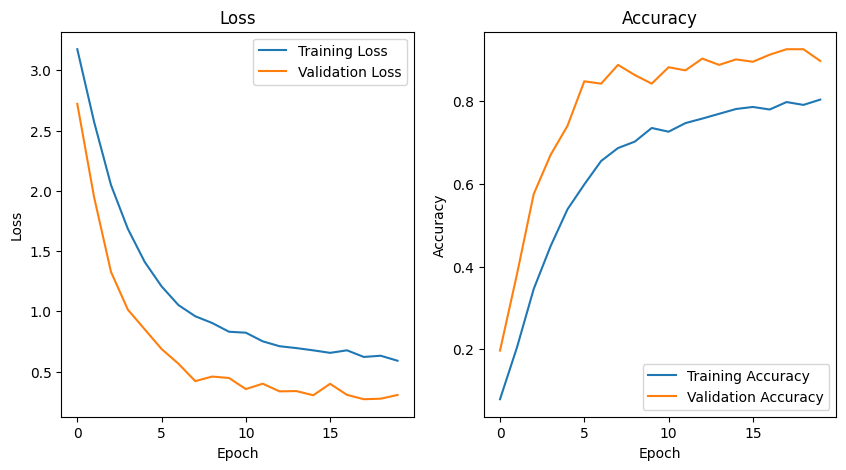

In [38]:
# Visualize Loss and Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
# Accuracy on Test Set
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Loss on Test Set: {test_loss, test_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8742 - loss: 0.4026
Loss on Test Set: (0.39877602458000183, 0.8806818127632141)


9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


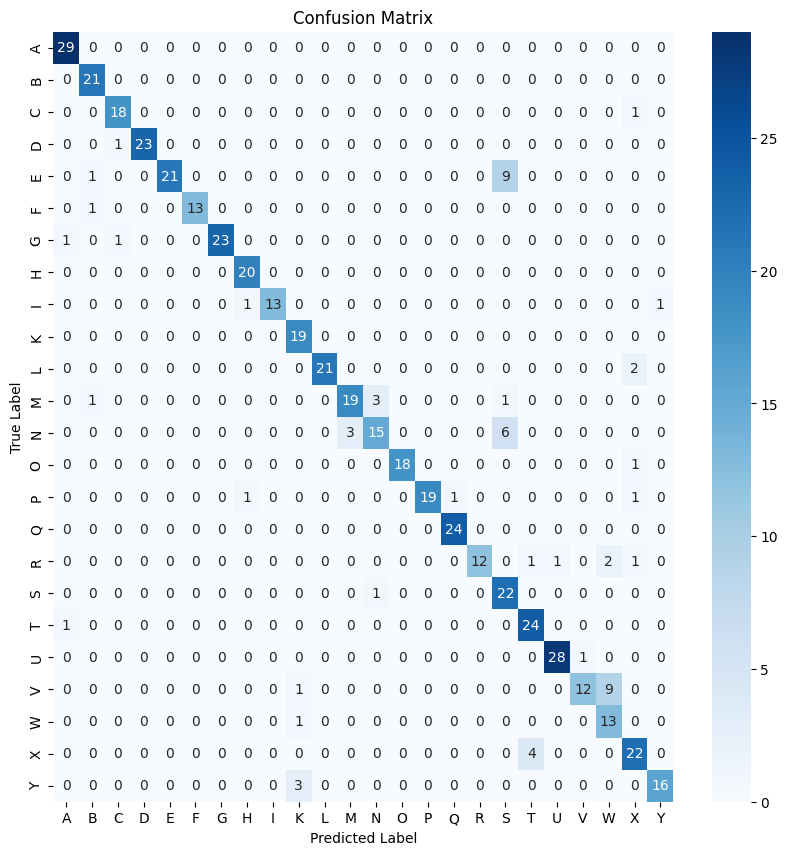

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(test_data.classes, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()